# Анализ доходов депутатов Государственной Думы РФ

In [1]:
import pandas as pd

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
sns.set(style="darkgrid")

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] =10, 4
import pandas as pd

# Вывод доходов в "денежном" формате
pd.options.display.float_format = '{:,.2f} руб'.format

## Импорт и обработка данных
Данные взяты с сайта https://declarator.org/reports/report_request_create/

In [2]:
# Импортируем таблицу с данными и удалим строки без указанного дохода
gd_income = pd.read_excel("gd_income.xlsx")
gd_income.columns = ["id", "name", "party", "year", "relative", "income"]
gd_income.dropna(inplace=True, subset=["income"])

# Заменим названия партий на более короткие для удобного вывода на графиках
gd_income.party.fillna("Беспартийный", inplace=True)
gd_income.party.replace("Communist Party of the Russian Federation", "КПРФ", inplace=True)
gd_income.party.replace('Демократическая партия России (Демократическая Россия)', "Демократическая Россия", inplace=True)

# Заменим значения столбца relative
gd_income.relative.fillna("self", inplace=True)
gd_income.relative.replace("Супруг(а)", "spouse", inplace=True)
gd_income.relative.replace("Ребенок", "kids", inplace=True)

In [3]:
gd_income.head()

,id,name,party,year,relative,income
0,503,Абалаков Алекандр Николаевич,КПРФ,2011,self,"3,760,635.61 руб"
1,503,Абалаков Алекандр Николаевич,КПРФ,2011,spouse,"86,400.00 руб"
2,555,Абдулатипов Рамазан Гаджимурадович,Единая Россия,2011,self,"5,854,001.45 руб"
3,555,Абдулатипов Рамазан Гаджимурадович,Единая Россия,2011,spouse,"4,941,921.25 руб"
4,343,Абрамов Иван Николаевич,ЛДПР,2011,self,"4,524,186.99 руб"


In [4]:
# Добавим категориальный столбец дохода в датафрейм
intervals = {
    "<500k": (0, 5*1e5), 
    "500k-2.5m": (5*1e5, 2.5*1e6), 
    "2.5m-10m": (2.5*1e6, 1e7), 
    "10m-100m": (1e7, 1e8),
    "100m-500m": (1e8, 5e8),
    ">500m": (5e8, 1e12),
}

def income_to_cat(val):
    for cat, ranges in intervals.items():
        if val >= ranges[0] and val < ranges[1]:
            return cat

gd_income["income_cat"] = gd_income["income"].apply(income_to_cat)

In [5]:
gd_income.head()

,id,name,party,year,relative,income,income_cat
0,503,Абалаков Алекандр Николаевич,КПРФ,2011,self,"3,760,635.61 руб",2.5m-10m
1,503,Абалаков Алекандр Николаевич,КПРФ,2011,spouse,"86,400.00 руб",<500k
2,555,Абдулатипов Рамазан Гаджимурадович,Единая Россия,2011,self,"5,854,001.45 руб",2.5m-10m
3,555,Абдулатипов Рамазан Гаджимурадович,Единая Россия,2011,spouse,"4,941,921.25 руб",2.5m-10m
4,343,Абрамов Иван Николаевич,ЛДПР,2011,self,"4,524,186.99 руб",2.5m-10m


## Анализ распределения доходов депутатов по годам

### Выведем графики распределения количества депутатов по годам по сумме дохода

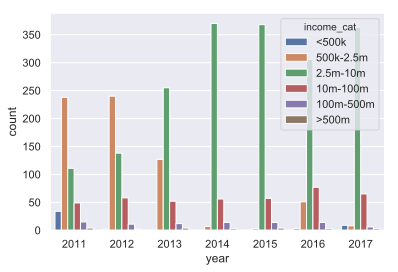

In [6]:
g = sns.countplot(
    x="year", hue="income_cat", 
    data=gd_income[gd_income.relative=="self"], 
    hue_order=intervals.keys()
)

На графике видно, что в начале 2010-х распределение доходов было более-менее похоже на "нормальное"<br>
Ближе к 2017 году в декларациях чаще стали встречаться цифры из диапазона 2.5-10 млн рублей в год

### Выведем графики распределения количества депутатов по годам по сумме дохода супругов

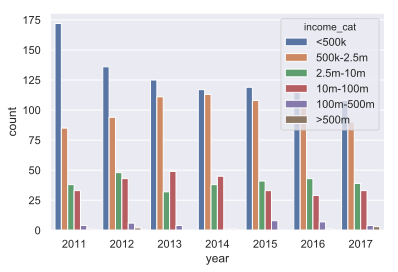

In [7]:
g = sns.countplot(
    x="year", hue="income_cat", 
    data=gd_income[gd_income.relative=="spouse"], 
    hue_order=intervals.keys()
)

По этому графику видно, что депутаты стали немного реже декларировать крупные доходы на супругов

### Выведем графики распределения количества депутатов по годам по сумме дохода детей

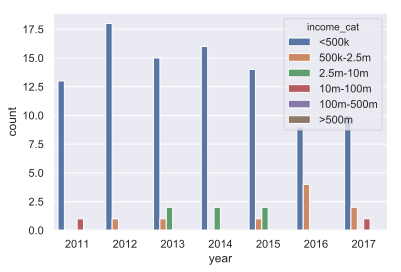

In [8]:
g = sns.countplot(
    x="year", hue="income_cat", 
    data=gd_income[gd_income.relative=="kids"], 
    hue_order=intervals.keys()
)

По этому графику также видно, что записывать доходы на детей стали реже

## Анализ распределения доходов депутатов по партиям

### Распределение доходов депутатов по партиям за 2011 год

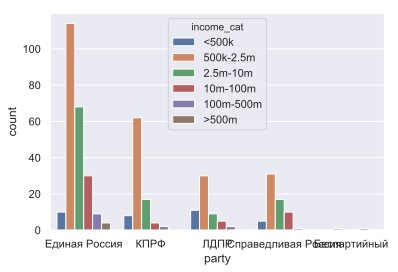

In [9]:
parties = ['Единая Россия', 'КПРФ', 'ЛДПР', 'Справедливая Россия', 'Беспартийный']
g = sns.countplot(
    x="party", hue="income_cat", 
    data=gd_income[(gd_income.relative=="self") & (gd_income.year==2011)], 
    hue_order=intervals.keys(), order=parties
)

Видно, опять же, что распределение более-менее "нормальное"<br>
И причем превалируют доходы в диапазоне "500к-2.5млн"<br>
У депутатов ЕдРа явно видно смещение к более высоким доходам по сравнению с остальными партиями

### Распределение доходов депутатов по партиям за 2014 год

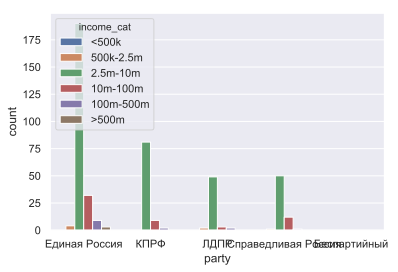

In [10]:
g = sns.countplot(
    x="party", hue="income_cat", 
    data=gd_income[(gd_income.relative=="self") & (gd_income.year==2014)], 
    hue_order=intervals.keys(), order=parties
)

Распределение сановится менее "нормальным"<br>
В основном превалируют доходы в диапазоне "2.5млн-10млн"

### Распределение доходов депутатов по партиям за 2014 год

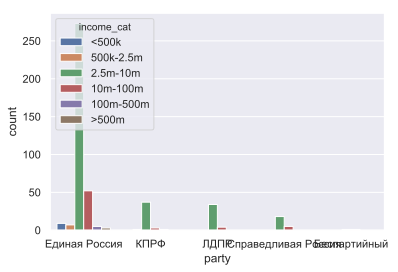

In [11]:
# Выведем графики распределения количества депутатов по партиям за 2017 год по сумме дохода
g = sns.countplot(
    x="party", hue="income_cat", 
    data=gd_income[(gd_income.relative=="self") & (gd_income.year==2017)], 
    hue_order=intervals.keys(), order=parties
)

## Медианный и средний доход ТОП-25 депутатов по годам

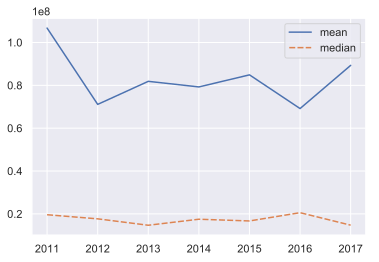

In [12]:
top_10_yearly = {}
for year in range(2011, 2018):
    tmp_df = gd_income[(gd_income.year==year) & (gd_income.relative=="self")].groupby(["id", "year"]).aggregate("sum")
    top_10_yearly[year] = {
        "median": tmp_df.sort_values("income", ascending=False).income[:100].median(),
        "mean": tmp_df.sort_values("income", ascending=False).income[:100].mean()
    }

top_10_yearly = pd.DataFrame.from_dict(top_10_yearly, orient="columns").T
sns.lineplot(data=top_10_yearly)

Медиана на графике гораздо ниже средней, что говорит о том, что доходы распределены неравномерно - часть людей имеет гораздо более высокие доходы чем у остальных

### Кол-во депутатов с доходом >10млн, >100млн, >1млрд по годам

In [13]:
top_stat_yearly = {}
for year in range(2011, 2018):
    tmp_df = gd_income[(gd_income.year==year) & (gd_income.relative=="self")].groupby(["id", "year"]).aggregate("sum")
    top_stat_yearly[year] = {
        ">10 млн руб.": len(tmp_df[tmp_df.income>1e7]),
        ">100 млн руб.": len(tmp_df[tmp_df.income>1e8]),
        ">1 млрд руб.": len(tmp_df[tmp_df.income>1e9]),
    }

top_stat_yearly = pd.DataFrame.from_dict(top_stat_yearly)
top_stat_yearly.sort_values(2011, ascending=False)

,2011,2012,2013,2014,2015,2016,2017
>10 млн руб.,68,70,68,73,75,95,74
>100 млн руб.,19,13,16,17,18,17,9
>1 млрд руб.,2,1,2,0,0,0,2


## ТОП'ы депутатов по доходам

### По собственным доходам

In [14]:
gd_income[(gd_income.relative=="self") & (gd_income.year==2017)].sort_values("income", ascending=False).head(10)

,id,name,party,year,relative,income,income_cat
4732,116,Аникеев Григорий Викторович,Единая Россия,2017,self,"4,311,002,189.61 руб",>500m
4802,196,Борцов Николай Иванович,Единая Россия,2017,self,"1,142,214,947.18 руб",>500m
5292,262,Симановский Леонид Яковлевич,Единая Россия,2017,self,"734,388,421.72 руб",>500m
5302,251,Скоч Андрей Владимирович,Единая Россия,2017,self,"262,245,229.10 руб",100m-500m
4784,31877,Блоцкий Владимир Николаевич,КПРФ,2017,self,"200,125,777.66 руб",100m-500m
5225,1130,Пономарев Аркадий Николаевич,Единая Россия,2017,self,"169,578,669.98 руб",100m-500m
5378,285,Хайруллин Айрат Назипович,Единая Россия,2017,self,"168,423,294.87 руб",100m-500m
5031,521,Когогина Альфия Гумаровна,Единая Россия,2017,self,"107,699,184.09 руб",100m-500m
4808,610,Брыксин Александр Юрьевич,Единая Россия,2017,self,"107,179,352.40 руб",100m-500m
5230,484,Прокопьев Александр Сергеевич,Единая Россия,2017,self,"92,734,761.15 руб",10m-100m


### По доходам супругов

In [15]:
gd_income[(gd_income.relative=="spouse") & (gd_income.year==2017)].sort_values("income", ascending=False).head(10)

,id,name,party,year,relative,income,income_cat
5155,513,Некрасов Александр Николаевич,КПРФ,2017,spouse,"2,320,605,747.20 руб",>500m
5258,231,Саблин Дмитрий Вадимович,Единая Россия,2017,spouse,"698,724,233.54 руб",>500m
5057,12783,Красноштанов Алексей Николаевич,Единая Россия,2017,spouse,"670,409,360.03 руб",>500m
5203,220,Петров Сергей Валериевич,Единая Россия,2017,spouse,"332,072,906.03 руб",100m-500m
4769,490,Белоусов Вадим Владимирович,Справедливая Россия,2017,spouse,"266,744,169.32 руб",100m-500m
5311,1161,Смирнов Юрий Валентинович,Единая Россия,2017,spouse,"167,059,620.05 руб",100m-500m
4866,31778,Гартунг Валерий Карлович,Справедливая Россия,2017,spouse,"102,996,797.00 руб",100m-500m
5297,15616,Синяговский Владимир Ильич,Единая Россия,2017,spouse,"99,518,905.41 руб",10m-100m
5293,262,Симановский Леонид Яковлевич,Единая Россия,2017,spouse,"85,414,981.32 руб",10m-100m
5403,12804,Чернышев Андрей Владимирович,Единая Россия,2017,spouse,"77,877,942.51 руб",10m-100m


### По доходам детей

In [16]:
gd_income[(gd_income.relative=="kids") & (gd_income.year==2017)].sort_values("income", ascending=False).head(25)

,id,name,party,year,relative,income,income_cat
4790,194,Богуславский Ирек Борисович,Единая Россия,2017,kids,"24,979,988.64 руб",10m-100m
5285,264,Сибагатуллин Фатих Саубанович,Единая Россия,2017,kids,"1,340,553.98 руб",500k-2.5m
5284,264,Сибагатуллин Фатих Саубанович,Единая Россия,2017,kids,"625,907.63 руб",500k-2.5m
4799,13486,Бондарь Оксана Андреевна,Единая Россия,2017,kids,"206,602.63 руб",<500k
5018,136,Квитка Иван Иванович,Единая Россия,2017,kids,"167,365.00 руб",<500k
5227,1130,Пономарев Аркадий Николаевич,Единая Россия,2017,kids,"104,160.00 руб",<500k
4830,615,Васильев Александр Николаевич,Единая Россия,2017,kids,"33,643.95 руб",<500k
4748,22037,Байгускаров Зариф Закирович,Единая Россия,2017,kids,"23,000.00 руб",<500k
5324,12394,Суббот Валентин Владимирович,Единая Россия,2017,kids,"9,074.13 руб",<500k
4786,31877,Блоцкий Владимир Николаевич,КПРФ,2017,kids,"3,865.08 руб",<500k
